### 0. Load libraries and custom functions
* If files are not available for plotting, please run get_data.ipynb to download/generate the files.

In [1]:
from functions import plot_total_trips_interactive, plot_trips_per_month_interactive, plot_on_map_interactive,\
                    plot_socio_on_map, plot_taxi_socio_interactive, create_heatmap, create_interactive_taxi_socio

import ipywidgets as widgets

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### 1. Plot the following to see trends and patterns in taxi trips in Jan-Jun 2022:
- total and monthly trip count for each day of the month
- total and monthly trip count for each hour or the day
- total and monthly trip count for each weekday
- total trip count for each borough

In [2]:
m = widgets.interactive(plot_total_trips_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

interactive(children=(Dropdown(description='pickup_or_dropoff', options=('Pickup', 'Dropoff'), value='Pickup')…

#### Findings:
- Taxi rides are quite evenly spread throughout the months; no distinct or interesting trends in taxi rides for each day of the month.
- Peak time for taxi rides appears to be around 6pm.
- Slightly fewer taxi rides on Monday and Sunday.
- Trip counts are lower in January and February, probably due to more tightened covid restrictions at the time.
- Around 90% of taxi rides started or ended in Manhattan; almost 99% of taxi rides were picked up in Manhattan and Queens, and there were slightly more drop-offs in Brooklyn compared to pick-ups.

### 2. Create similar plots as above but for each month in Jan-Jun 2022 as a GIF file.

In [3]:
m = widgets.interactive(plot_trips_per_month_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

interactive(children=(Dropdown(description='pickup_or_dropoff', options=('Pickup', 'Dropoff'), value='Pickup')…

![PU_trip_counts_per_month.gif](data/png/PU_trip_counts_per_month.gif)

![DO_trip_counts_per_month.gif](data/png/DO_trip_counts_per_month.gif)

#### Findings:
- Cyclic trends in trip count for each day of the month; the cycle appears to be a week.
- Little changes over time in trip count for each hour of the day - peak time after ordinary working hours.
- There were some variations over time in trip count for each weekday but there were generally fewer taxi rides on Monday and Sunday.
- In all months, the vast majority of the taxi rides happened in Manhattan.

### 3. Plot sum and average of passenger count, total fare, congestion charge, airport fee, duration, trip distance, minute per mile, and total trip count for each CDTA on the map of NYC.

interactive(children=(Dropdown(description='exclude_manhattan', options=(False, True), value=False), Output())…

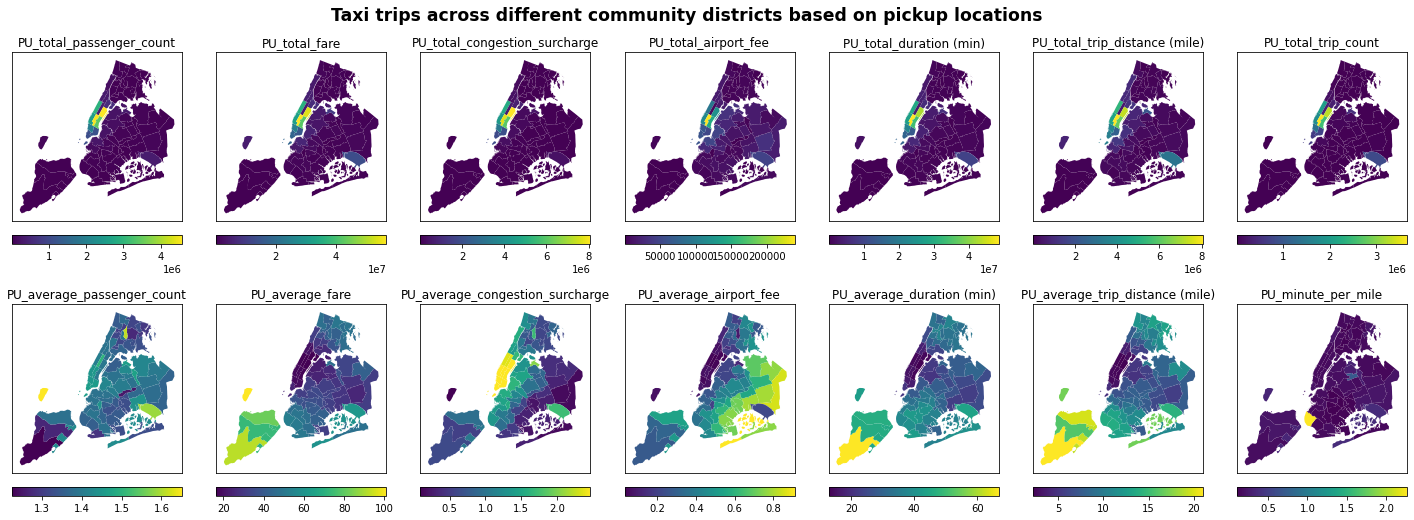

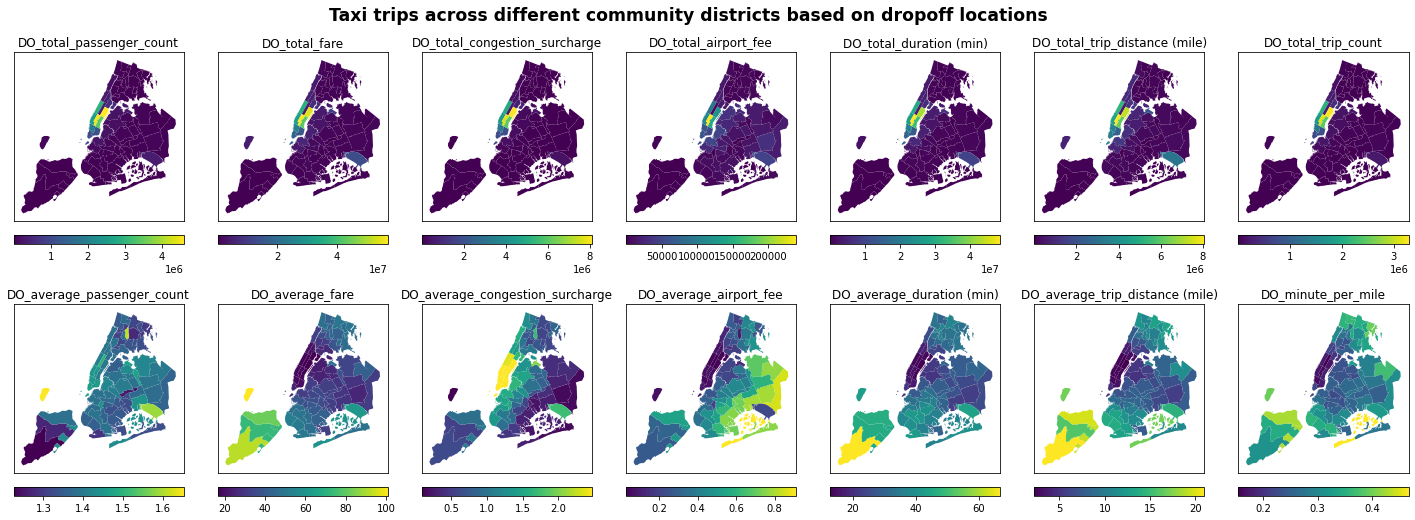

In [4]:
m = widgets.interactive(plot_on_map_interactive,
                        exclude_manhattan = [False, True])
display(m)

#### Findings:
-
-
\* Plots look very similar whether it's based on pickup or dropoff location, except for minute per mile. For this reason, each of the pickup and dropoff variables, excluding minute per mile, will be averaged and combined as a single variable in later analyses.

### 4. Plot a similar small multiple as above, but using socioeconomic data instead of taxi trip data.

cdta_df loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.


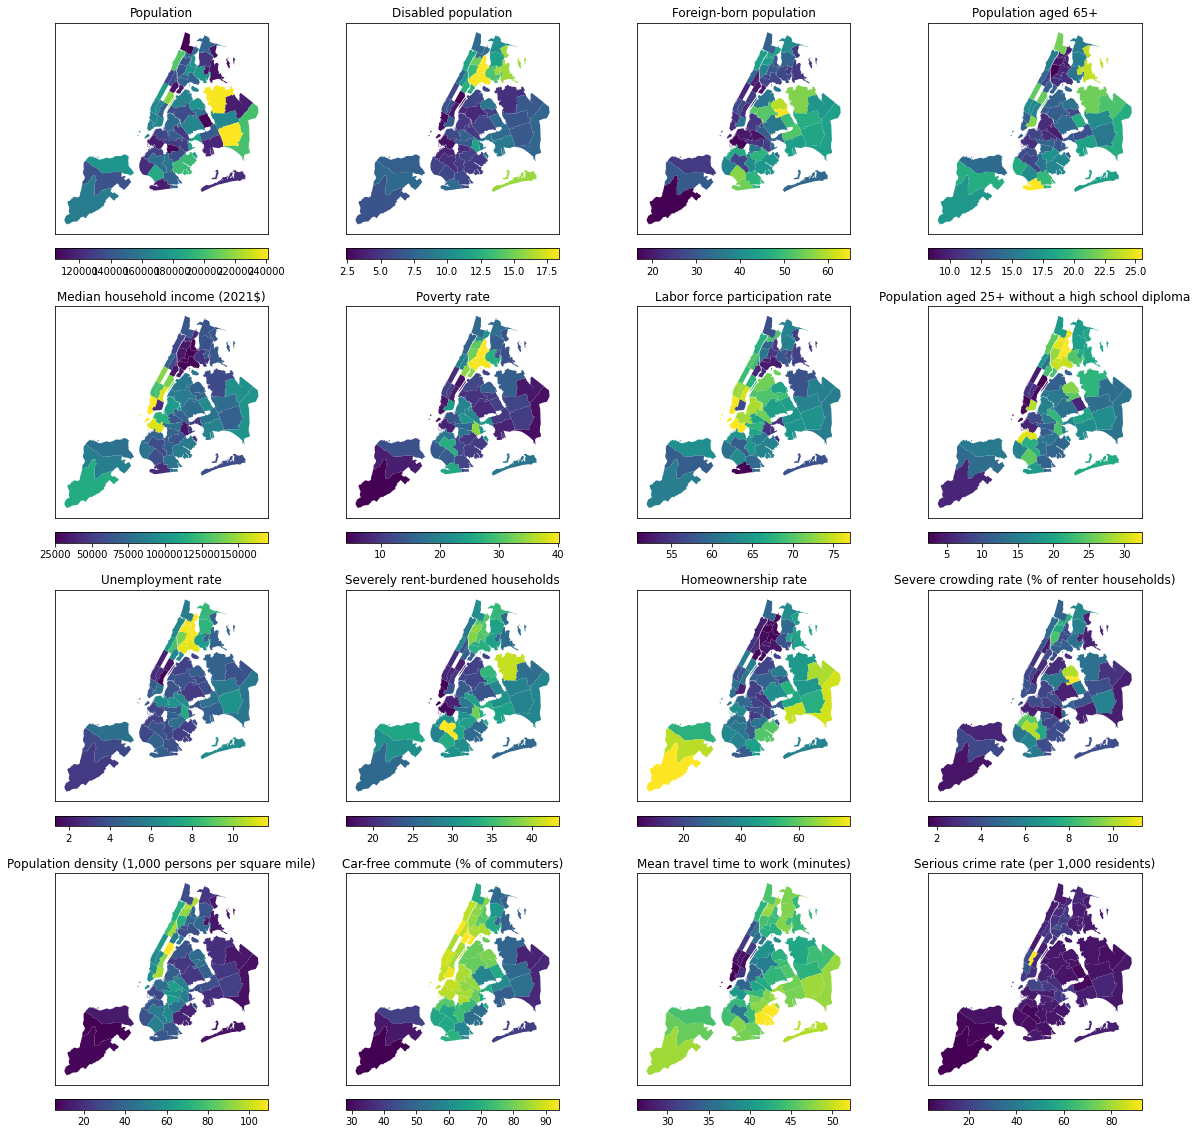

In [5]:
plot_socio_on_map()

### 5. Plot a heatmap based on correlation matrix to see how each of the taxi and socio variables are correlated.

cdta_df loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
Combining the PU and DO columns, except minute per mile, by averaging the values in cdta_df.


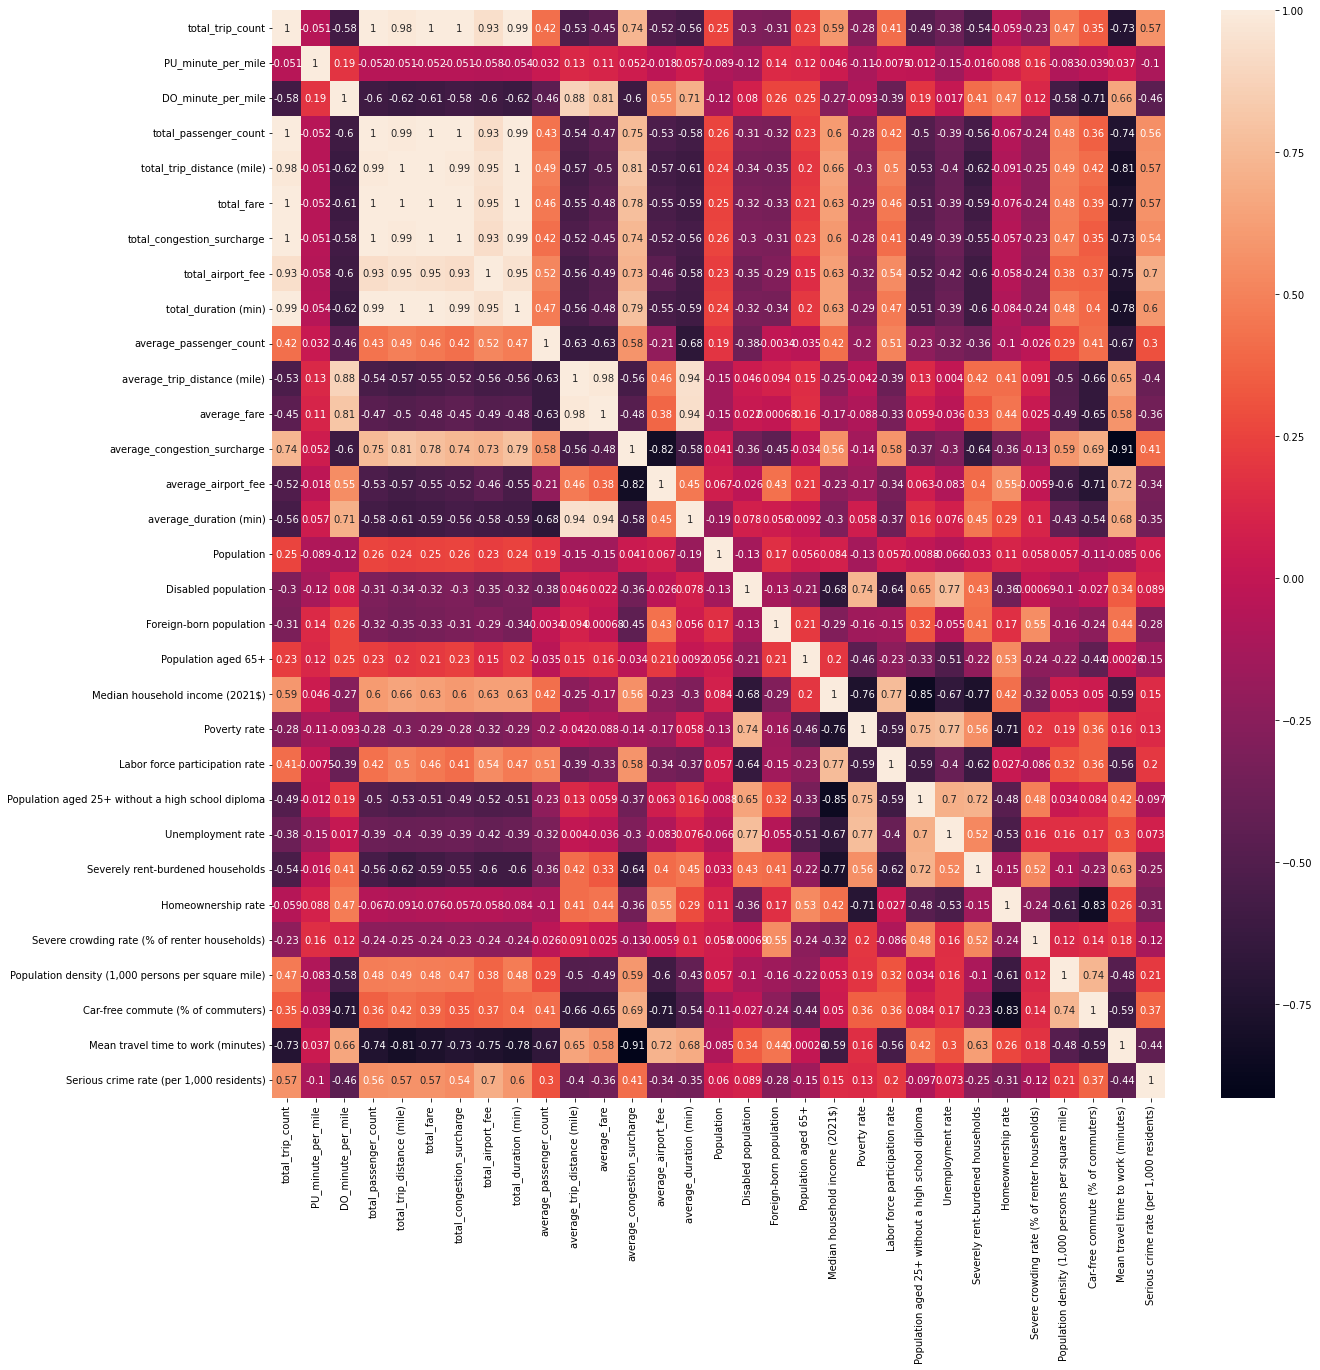

In [6]:
create_heatmap()

### 6. Plot each of the taxi and socio variables at the same time interactively.

interactive(children=(Dropdown(description='taxi_col', options=('total_trip_count', 'PU_minute_per_mile', 'DO_…

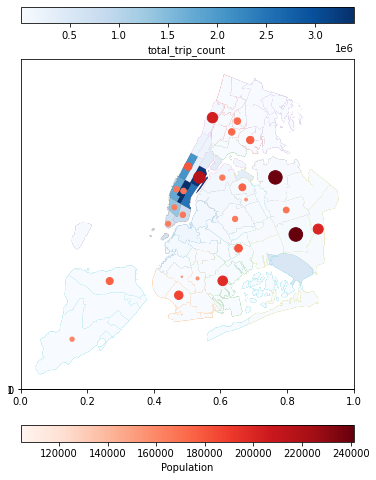

In [7]:
taxi_cols = [
    'total_trip_count', 'PU_minute_per_mile', 'DO_minute_per_mile',
    'total_passenger_count', 'total_trip_distance (mile)',
    'total_fare', 'total_congestion_surcharge', 'total_airport_fee', 'total_duration (min)',
    'average_passenger_count', 'average_trip_distance (mile)', 'average_fare',
    'average_congestion_surcharge', 'average_airport_fee', 'average_duration (min)']

socio_cols = [
    'Population',
    'Disabled population',
    'Foreign-born population',
    'Population aged 65+',
    'Median household income (2021$)',
    'Poverty rate',
    'Labor force participation rate',
    'Population aged 25+ without a high school diploma',
    'Unemployment rate',
    'Severely rent-burdened households',
    'Homeownership rate',
    'Severe crowding rate (% of renter households)',
    'Population density (1,000 persons per square mile)',
    'Car-free commute (% of commuters)',
    'Mean travel time to work (minutes)',
    'Serious crime rate (per 1,000 residents)']

m = widgets.interactive(plot_taxi_socio_interactive,
                        taxi_col=taxi_cols,
                        socio_col=socio_cols,
                        top_n=range(0, 75, 5))
display(m)

### 7. Create a similar choropleth but with interactive tooptips for each CDTA/CD.

In [8]:
m = widgets.interactive(create_interactive_taxi_socio, taxi_col=taxi_cols, socio_col=socio_cols)
display(m)

interactive(children=(Dropdown(description='taxi_col', options=('total_trip_count', 'PU_minute_per_mile', 'DO_…